<h1><center>Parkinson’s disease Prediction</center></h1>

In [1]:
#ِ##################################################################################################################
#                                           Asmaa Ali Abdelwahab Ali                                              #
#                                                  ID:1910069                                                     #
#                                          CIT-651: ML_Course_Project                                             #
#                                            Prof. Moustafa ElAttar                                               #
###################################################################################################################

# 1. Problem Definition

## Abstract 
- Parkinson’s disease is the second most common age-related neurodegenerative disorder after Alzheimer’s disease. An estimated seven to 10 million people worldwide have Parkinson’s disease. Parkinson’s disease is a progressive disorder of the central nervous system affecting movement and inducing tremors and stiffness. It has 5 stages to it. Early detection and diagnosis is important because the treatments for PD are more effective in the early stages of the disease. In addition, physical therapy and exercise, which greatly improve symptoms and delay progression of the disease, are much easier to perform in the early stages.

## Data Set

- Data Source: https://archive.ics.uci.edu/ml/datasets/parkinsons
- This dataset is composed of a range of biomedical voice measurements from 31 people, 23 with Parkinson's disease (PD). Each column in the table is a particular voice measure, and each row corresponds one of 195 voice recording from these individuals. There are around six recordings per patient.
### Attribute Information:

- name - ASCII subject name and recording number
- MDVP:Fo(Hz) - Average vocal fundamental frequency
- MDVP:Fhi(Hz) - Maximum vocal fundamental frequency
- MDVP:Flo(Hz) - Minimum vocal fundamental frequency
- MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several measures of variation in fundamental frequency
- MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude
- NHR,HNR - Two measures of ratio of noise to tonal components in the voice
- status - Health status of the subject (one) - Parkinson's, (zero) - healthy
- RPDE,D2 - Two nonlinear dynamical complexity measures
- DFA - Signal fractal scaling exponent
- spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation

## Prepare libraries and dataset

In [2]:
# Load libraries
import numpy as np 
import pandas as pd 
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from xgboost import XGBClassifier
import sklearn.metrics as metrics
import sklearn.model_selection as ms
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, power_transform
from sklearn.ensemble import VotingClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression, Perceptron, ElasticNet, Lasso
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import VarianceThreshold
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load dataset
df1 = pd.read_csv('single term/parkinsons.data', sep = ',', header = 0)

# 2. Summerize Dataset

## Descriptive Statistics

In [4]:
df1.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [5]:
# types
df1.dtypes

name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object

#### ===> All of the attributes are numeric (float) and that the name value has been read in as an object and the status is read in as an integer.

In [6]:
# Data shape
df1.shape

(195, 24)

#### ===> We have 195 instances to work with and the data has 24 attributes including the status attribute. 

In [7]:
# Number of duplicated rows
df1.duplicated(keep='first').sum()

0

In [8]:
# The row and column indices where the value is NaN
np.where(pd.isnull(df1))

(array([], dtype=int64), array([], dtype=int64))

#### ===> There is no duplicated rows and no missing values.

In [9]:
# Basic Descriptive statistics
pd.set_option('precision', 2)
df1.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.00,195.00,195.00,1.95e+02,1.95e+02,1.95e+02,1.95e+02,1.95e+02,1.95e+02,195.00,...,195.00,1.95e+02,195.00,195.00,195.00,195.00,195.00,1.95e+02,195.00,195.00
mean,154.23,197.10,116.32,6.22e-03,4.40e-05,3.31e-03,3.45e-03,9.92e-03,2.97e-02,0.28,...,0.05,2.48e-02,21.89,0.75,0.50,0.72,-5.68,2.27e-01,2.38,0.21
std,41.39,91.49,43.52,4.85e-03,3.48e-05,2.97e-03,2.76e-03,8.90e-03,1.89e-02,0.19,...,0.03,4.04e-02,4.43,0.43,0.10,0.06,1.09,8.34e-02,0.38,0.09
min,88.33,102.14,65.48,1.68e-03,7.00e-06,6.80e-04,9.20e-04,2.04e-03,9.54e-03,0.09,...,0.01,6.50e-04,8.44,0.00,0.26,0.57,-7.96,6.27e-03,1.42,0.04
25%,117.57,134.86,84.29,3.46e-03,2.00e-05,1.66e-03,1.86e-03,4.98e-03,1.65e-02,0.15,...,0.02,5.92e-03,19.20,1.00,0.42,0.67,-6.45,1.74e-01,2.10,0.14
50%,148.79,175.83,104.31,4.94e-03,3.00e-05,2.50e-03,2.69e-03,7.49e-03,2.30e-02,0.22,...,0.04,1.17e-02,22.09,1.00,0.50,0.72,-5.72,2.19e-01,2.36,0.19
75%,182.77,224.21,140.02,7.37e-03,6.00e-05,3.83e-03,3.96e-03,1.15e-02,3.79e-02,0.35,...,0.06,2.56e-02,25.08,1.00,0.59,0.76,-5.05,2.79e-01,2.64,0.25
max,260.11,592.03,239.17,3.32e-02,2.60e-04,2.14e-02,1.96e-02,6.43e-02,1.19e-01,1.30,...,0.17,3.15e-01,33.05,1.00,0.69,0.83,-2.43,4.50e-01,3.67,0.53


#### ===> The data has different ranges. We will need to standardize our data.

In [10]:
# class distribution
print(df1.groupby('status').size())

status
0     48
1    147
dtype: int64


#### ===> The data is unbalanced because the samples originally from 31 people, 23 with Parkinson's disease (PD).

In [11]:
# Correlation
pd.set_option('precision', 2)
corrMat = df1.corr(method='pearson')

In [12]:
corrMat[corrMat > 0.7].count()+corrMat[corrMat < -0.7].count()

MDVP:Fo(Hz)          1
MDVP:Fhi(Hz)         1
MDVP:Flo(Hz)         1
MDVP:Jitter(%)      14
MDVP:Jitter(Abs)    10
MDVP:RAP            13
MDVP:PPQ            15
Jitter:DDP          13
MDVP:Shimmer        13
MDVP:Shimmer(dB)    13
Shimmer:APQ3        12
Shimmer:APQ5        12
MDVP:APQ            12
Shimmer:DDA         12
NHR                 11
HNR                 12
status               1
RPDE                 1
DFA                  1
spread1              4
spread2              1
D2                   1
PPE                  7
dtype: int64

#### ===> There are thirteen feature correlating with more than ten other features. We will need to remove the highly correlated features.

## Data Visualization

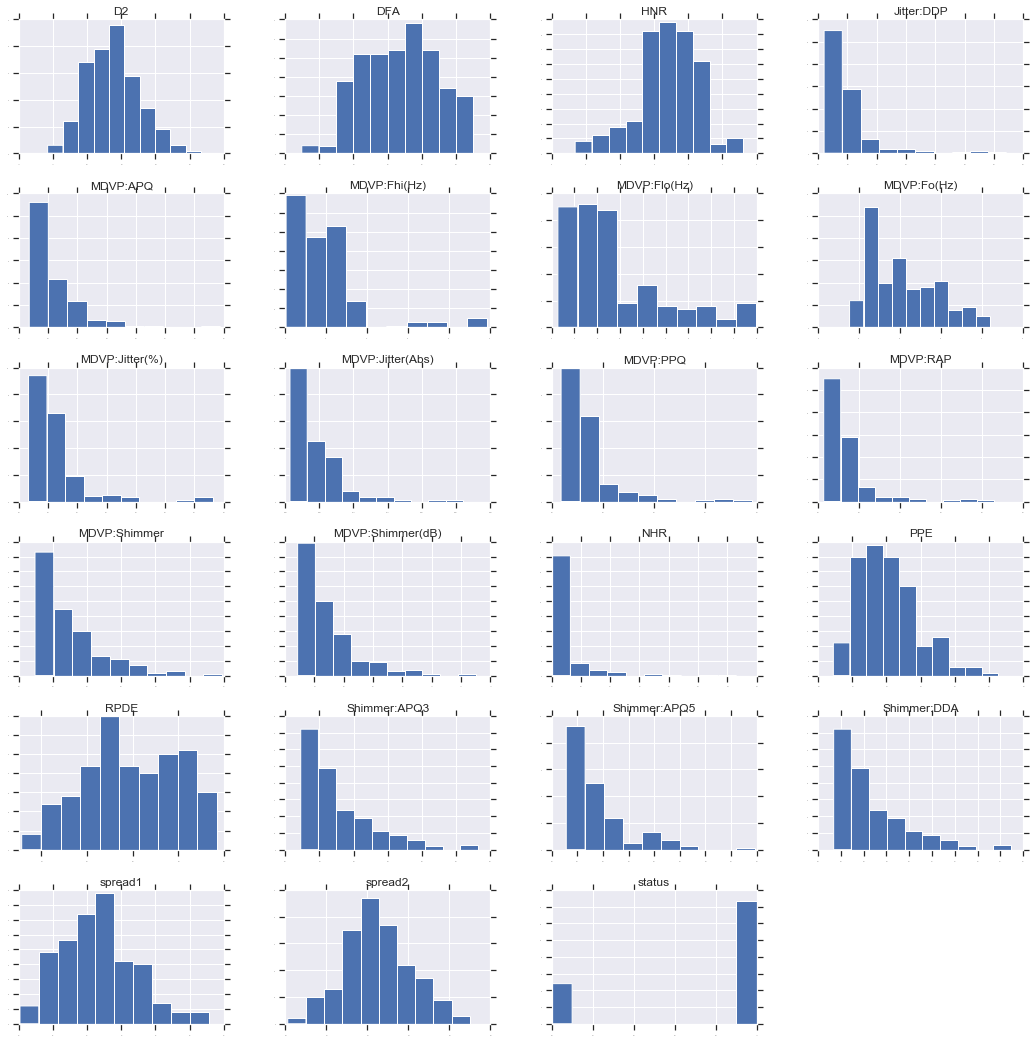

In [13]:
# histograms
sns.set()
df1.hist(sharex=False, sharey=False, xlabelsize=1, layout=(6,4), ylabelsize=1, figsize=(18,18))
plt.show()

#### ===> There are a lot of Gaussian-like distributions and perhaps some exponential-like distributions for other attributes.

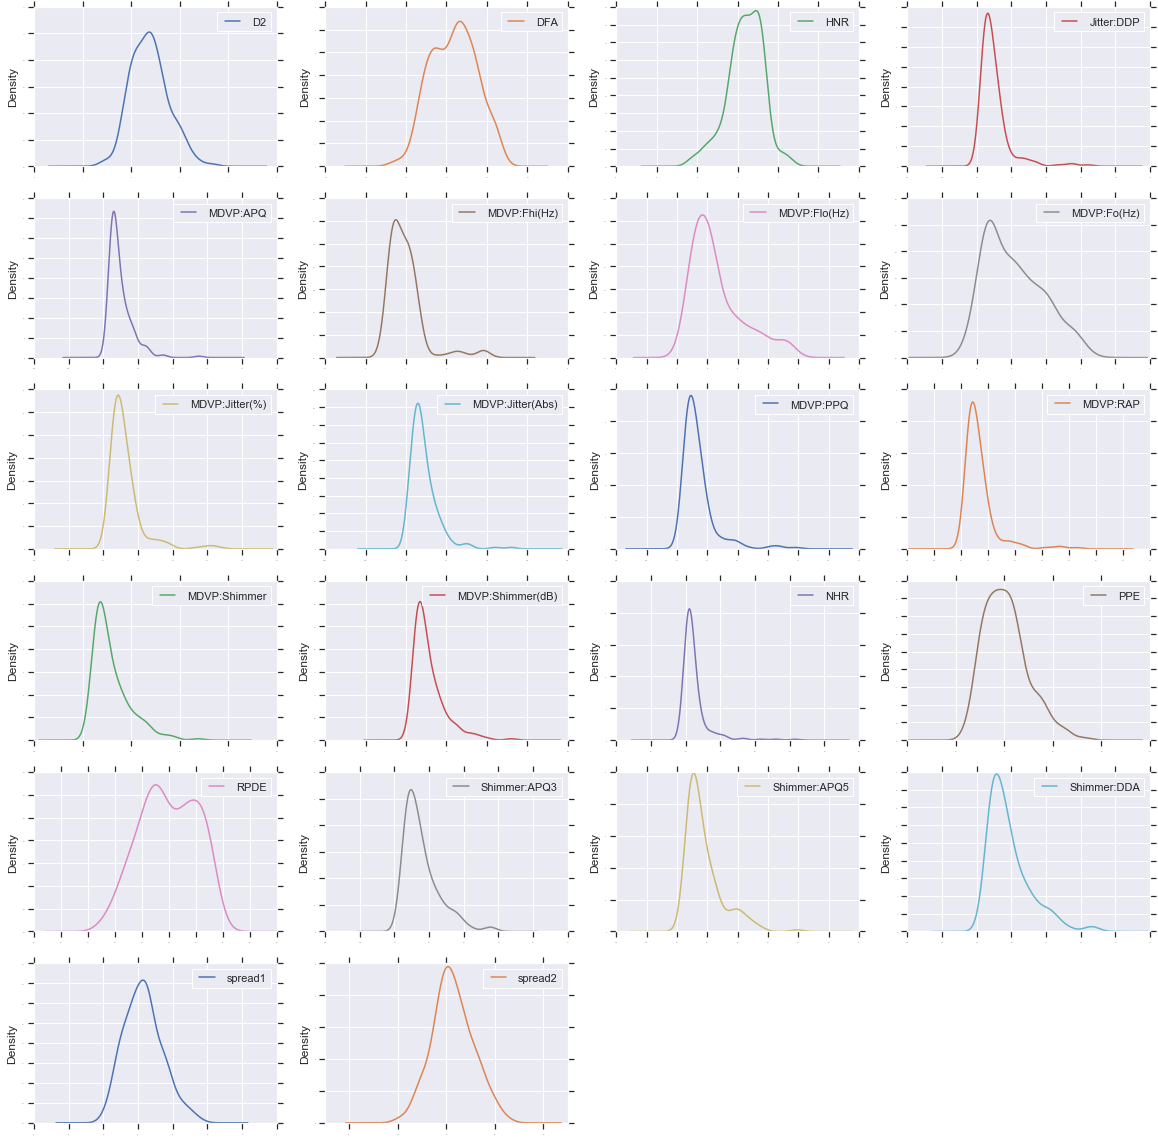

In [14]:
# density
df1[df1.columns.difference(['status', 'name'])].plot(kind='density', subplots=True, layout=(6,4), sharex=False, legend=True, fontsize=1, figsize=(20,20))
plt.show()

#### ===> Many of the attributes have a skewed distribution. Box-Cox transform that can correct for the skew in distributions might be useful (as the data contains negative values, we can use yeo-johnson transform).

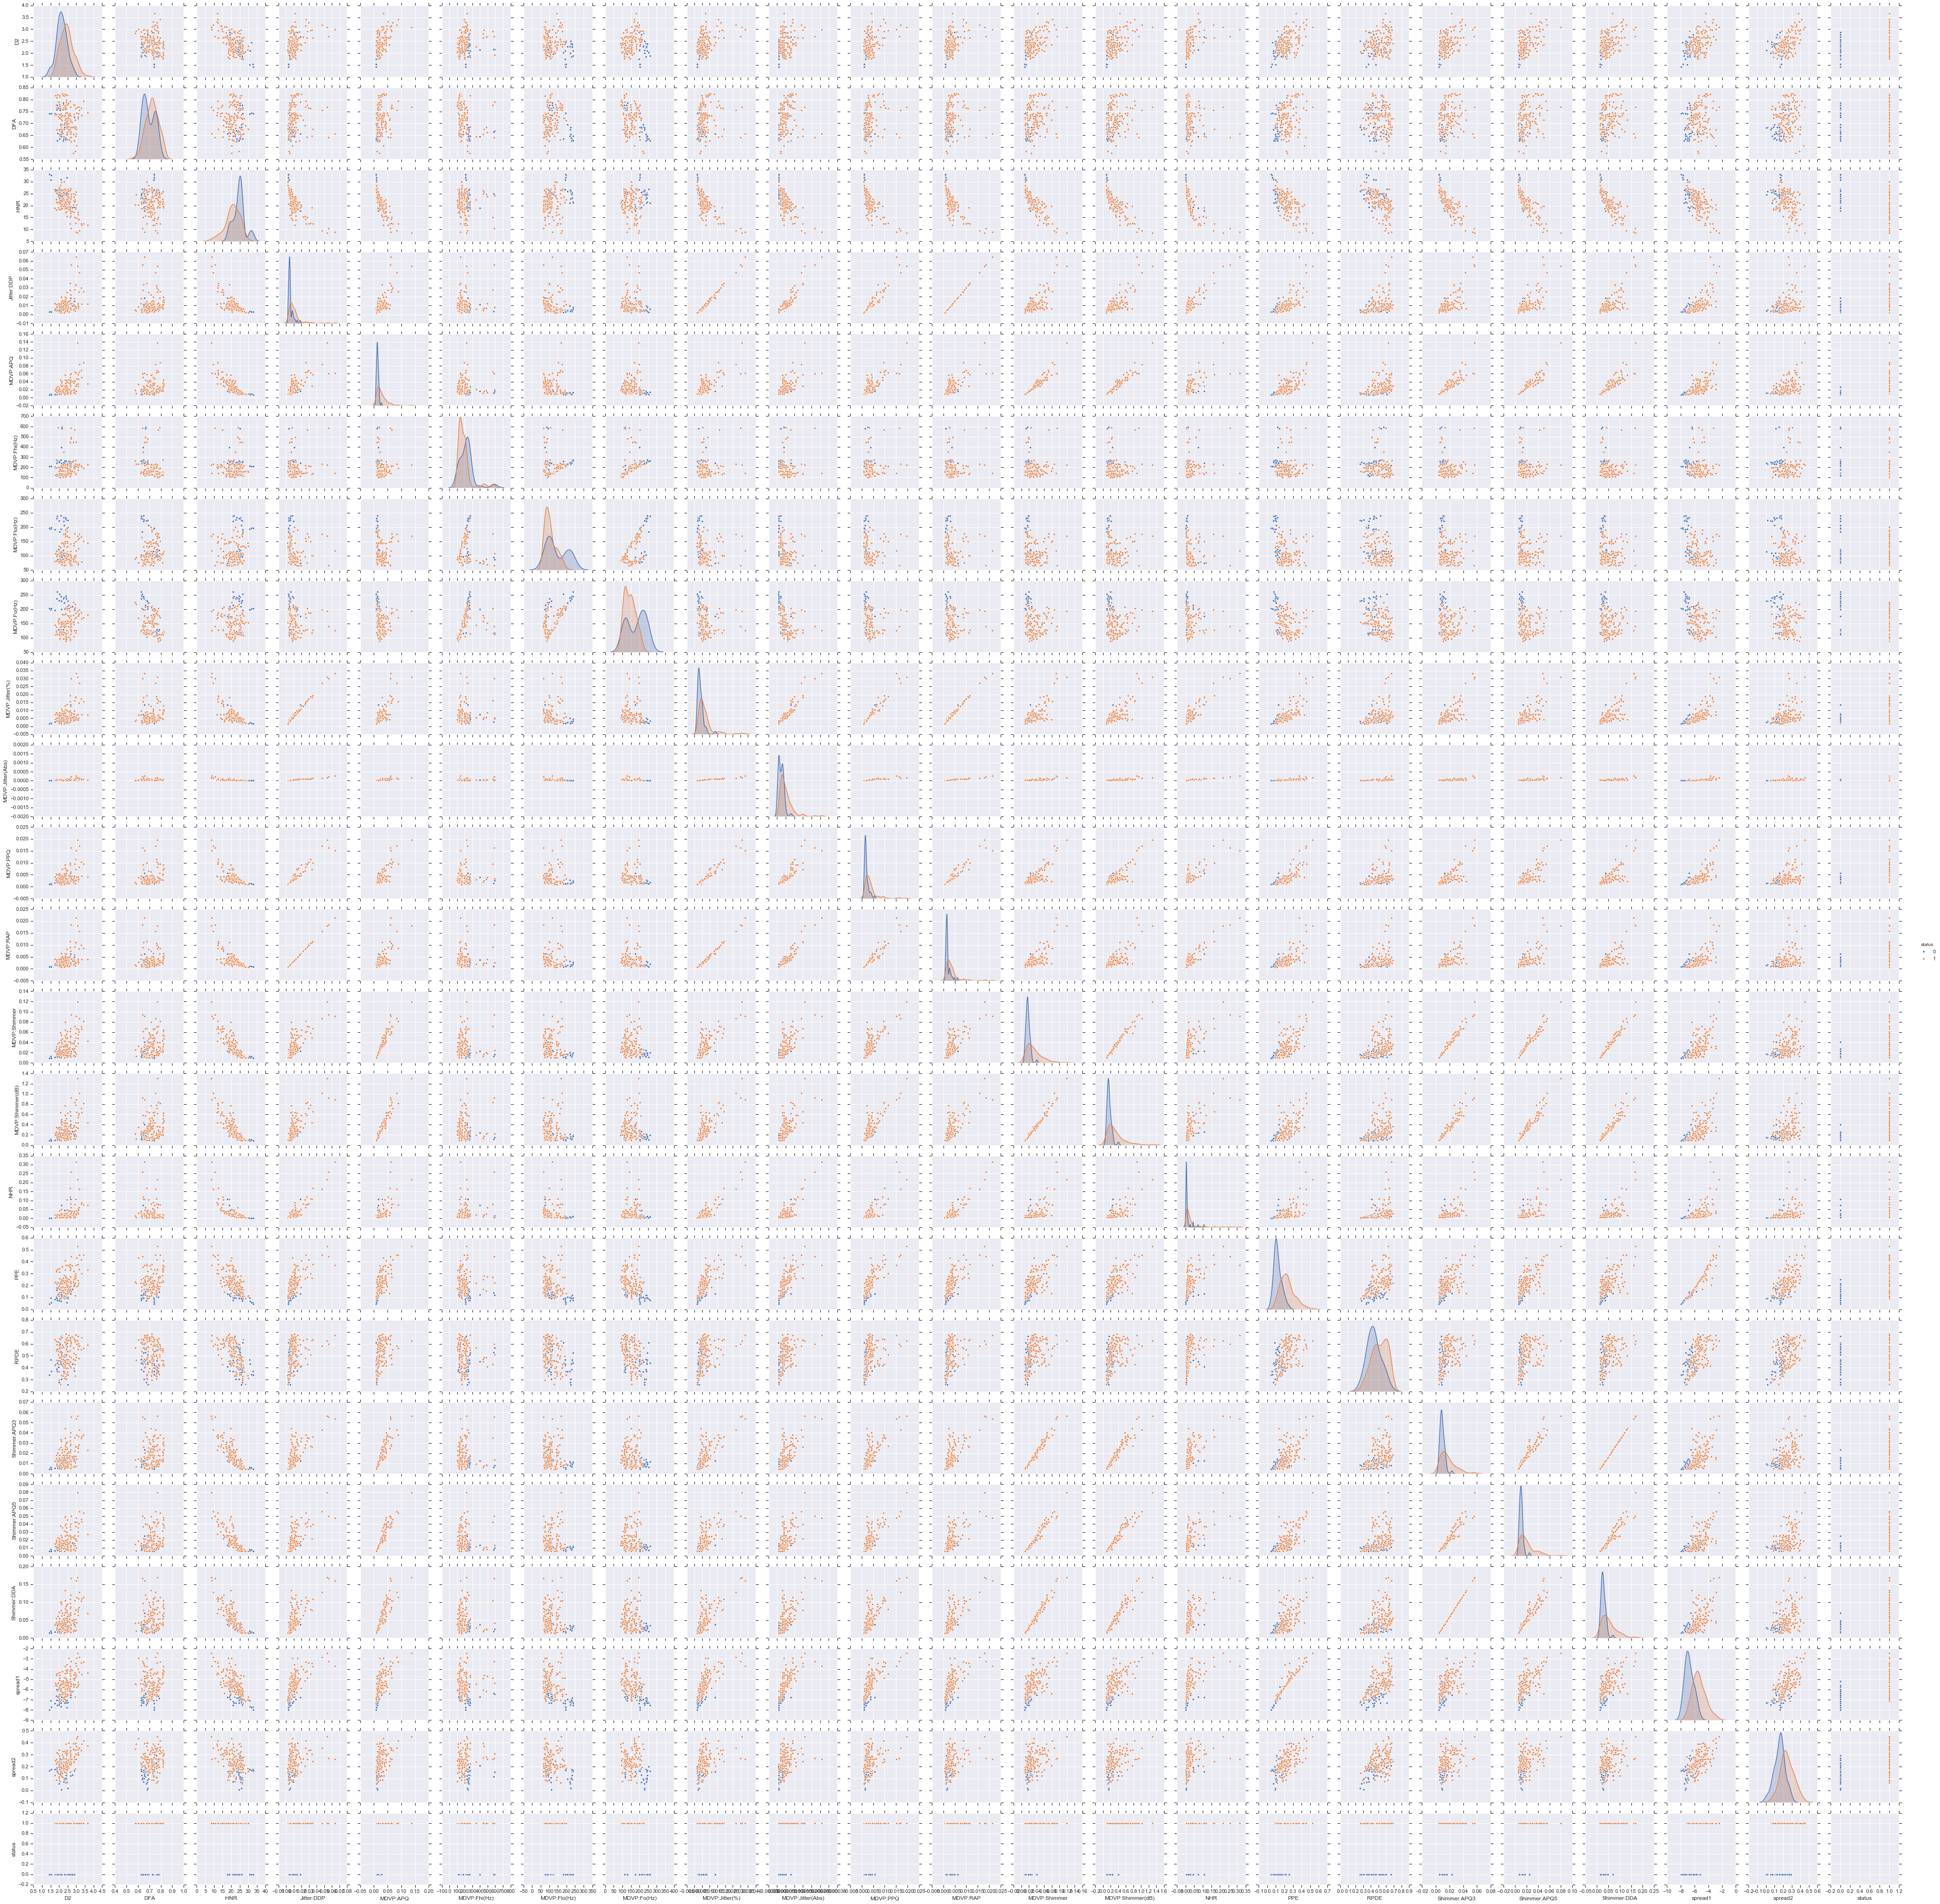

In [15]:
# Paired plot using seaborn
sns.pairplot(df1[df1.columns.difference(['name'])], hue="status", diag_kind="kde")

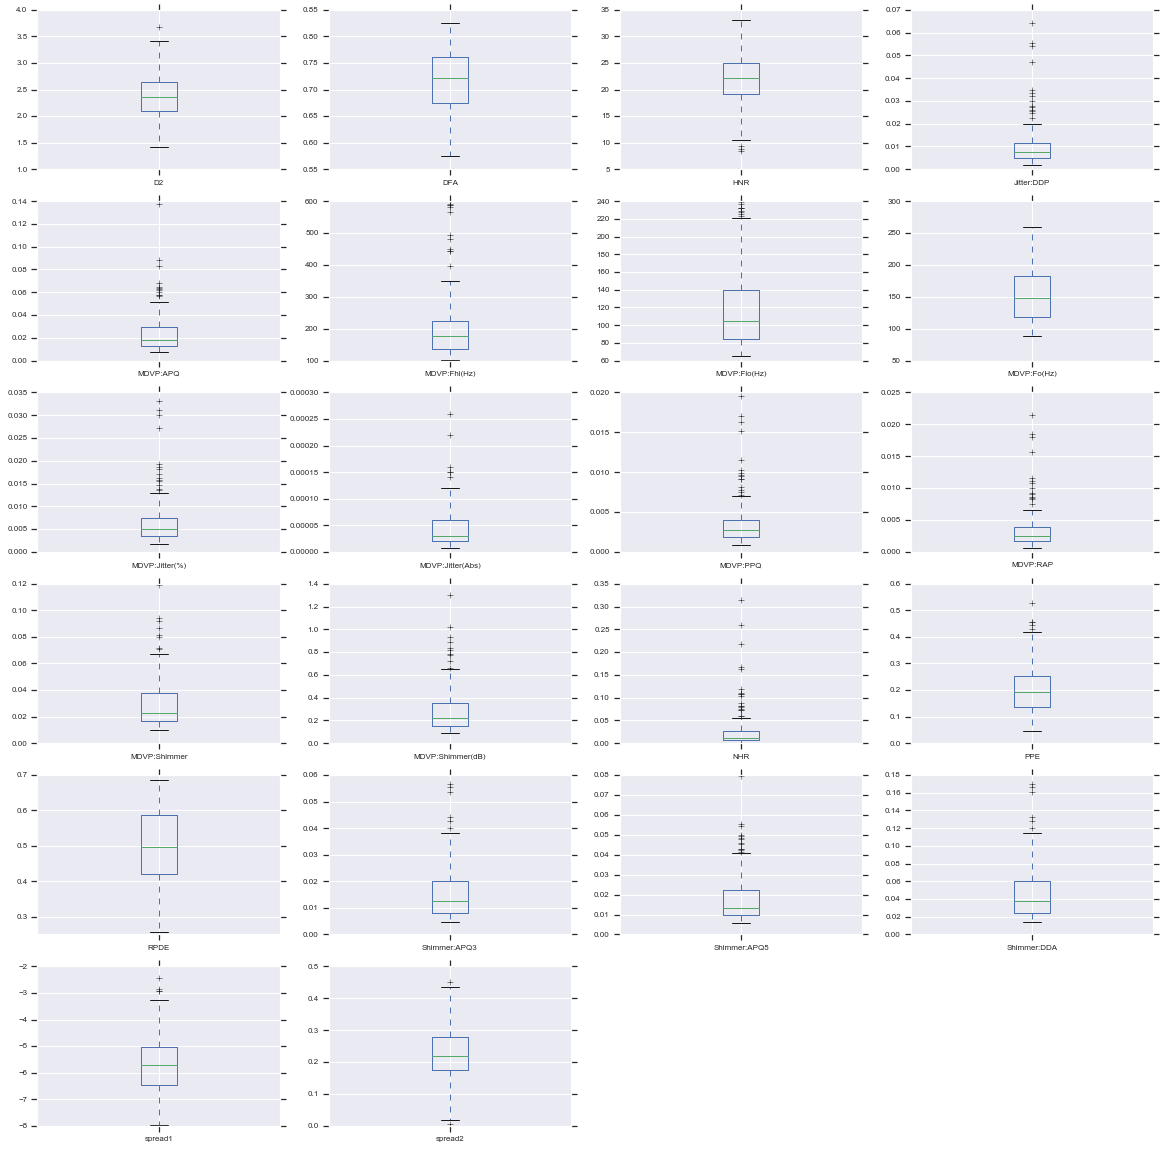

In [16]:
# box and whisker plots
df1[df1.columns.difference(['status', 'name'])].plot(kind='box', subplots=True, layout=(6,4), sharex=False, sharey=False,fontsize=8, figsize=(20,20))
plt.show()

#### ===> Attributes do have quite different spreads. It may be benefitial to standardize the data for modeling to get all of the means lined up.

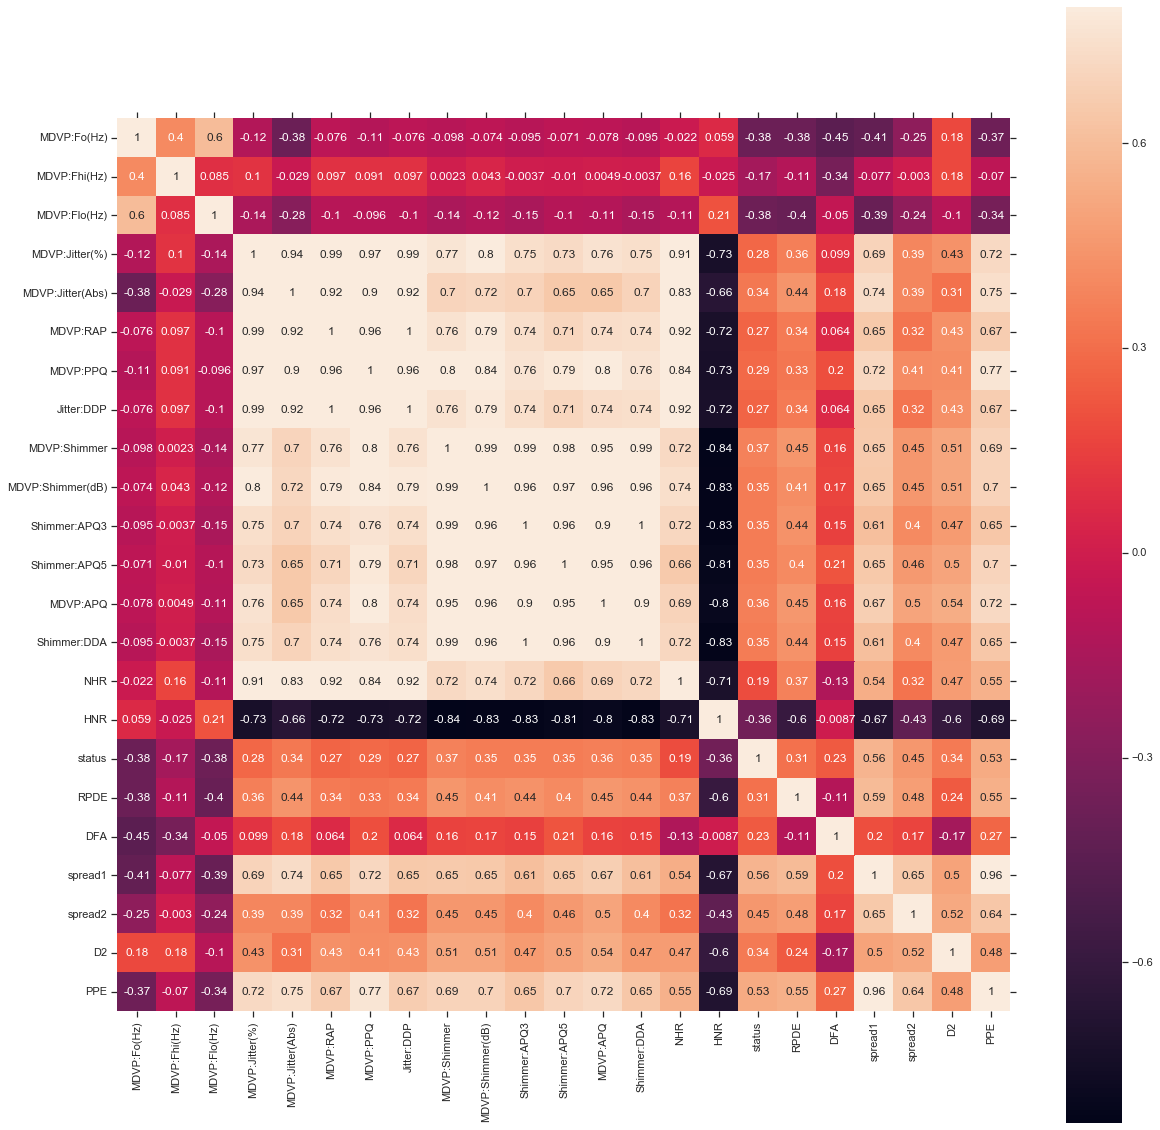

In [17]:
corrMat1 = df1[::].corr(); 
fig1, ax1 = plt.subplots(figsize=(20,20))  
sns.heatmap(corrMat1, vmax=0.8, square = True, annot=True, ax=ax1)

#### ===> There is some structure in the order of the attributes. The light color around the diagonal suggests that attributes that are next to each other are generally more correlated with each other. The darker patches also suggest some moderate negative correlation the further attributes are away from each other in the ordering.

# 3. Prepare Data

## Data Preprocessing

In [18]:
def preprocess_data(file_name):
    
    seed = 10
    pd.set_option('display.max_colwidth', -1)
    
    # Read_csv
    df = pd.read_csv(file_name)
    
    # yeo-johnson transformation
    #df[df.columns.difference(['status', 'name'])] = power_transform(df[df.columns.difference(['status', 'name'])], method='yeo-johnson')
    
    # prepare i/p, o/p data
    X = df.loc[:,df.columns.difference(['status', 'name'])]
    y = df.loc[:,'status']
    print("\nThe number of features before removing correlated features is: ", len(X.columns))
    
    # Remove correlated features
    corr_matrix = X.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
    to_drop = (column for column in upper.columns if any(upper[column] > 0.95))
    X = X.drop(to_drop, axis =1)
    print("\nThe number of features after removing correlated features is: ", len(X.columns),'\n')
    for i in X.columns:
        print('\t',i)

    # Split data to train and test
    x_train, x_test, y_train, y_test = ms.train_test_split(X, y, test_size = 0.2, random_state = 0)
    return(X, y, x_train, x_test, y_train, y_test)

In [19]:
X, y, x_train, x_test, y_train, y_test = preprocess_data('single term/parkinsons.data')


The number of features before removing correlated features is:  22

The number of features after removing correlated features is:  13 

	 D2
	 DFA
	 HNR
	 Jitter:DDP
	 MDVP:APQ
	 MDVP:Fhi(Hz)
	 MDVP:Flo(Hz)
	 MDVP:Fo(Hz)
	 MDVP:Jitter(Abs)
	 NHR
	 PPE
	 RPDE
	 spread2


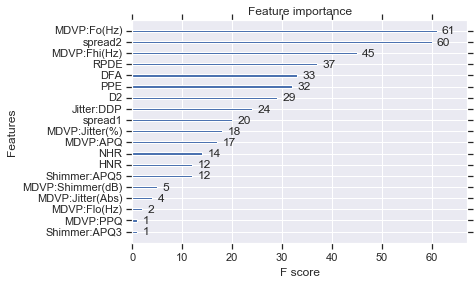

In [20]:
from xgboost import XGBClassifier
from xgboost import plot_importance

# split data into X and y
X = df1.loc[:,df1.columns.difference(['status', 'name'])]
y = df1.loc[:,'status']
# fit model no training data
model = XGBClassifier()
model.fit(X, y)
# plot feature importance
plot_importance(model)
plt.savefig('feature_importance.png')
plt.show()

## Evaluating Algorithms

In [21]:
# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'accuracy'

In [22]:
# Check Algorithms
models = []
#Linear Discriminative Models
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('PRC', Perceptron()))
#Linear Generative Models
models.append(('LR',LogisticRegression()))
models.append(('NB', GaussianNB()))
#Nonlinear models
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))

models.append(('SVM', SVC(probability=True)))
models.append(('RF', RandomForestClassifier()))
models.append(('GB', GradientBoostingClassifier()))
models.append(('MLP', MLPClassifier()))

# evaluate each model in turn
results = []
names = []
acc = []
for name, model in models:
    kfold = ms.KFold(n_splits=num_folds, random_state=seed)
    cv_results = ms.cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    acc.append(cv_results.mean())

In [23]:
# Check Algorithms
pipelines = []
#Linear Discriminative Models
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()), ('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledPRC', Pipeline([('Scaler', StandardScaler()), ('PRC', Perceptron())])))
#Linear Generative Models
pipelines.append(('ScaledLR',Pipeline([('Scaler', StandardScaler()),('LR',LogisticRegression())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()), ('GB', GaussianNB())])))
#Nonlinear models
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()), ('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledDT', Pipeline([('Scaler', StandardScaler()), ('DT', DecisionTreeClassifier())])))

pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()), ('SVC', SVC(probability=True))])))
pipelines.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()), ('RF', RandomForestClassifier())])))
pipelines.append(('ScaledGB', Pipeline([('Scaler', StandardScaler()), ('GB', GradientBoostingClassifier())])))
pipelines.append(('ScaledMLP', Pipeline([('Scaler', StandardScaler()), ('MLP', MLPClassifier())])))

# evaluate each model in turn
results_scaled = []
names_scaled = []
acc_scaled = []
for name, model in pipelines:
    kfold = ms.KFold(n_splits=num_folds, random_state=seed)
    cv_results = ms.cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
    results_scaled.append(cv_results)
    names_scaled.append(name)
    acc_scaled.append(cv_results.mean())

In [24]:
#Print accuracies before and after scaling
acc = pd.DataFrame(list(zip(names,acc,acc_scaled)), columns=['Algorithm','Accuracy before scaling','Accuracy after scaling'])
acc

,Algorithm,Accuracy before scaling,Accuracy after scaling
0,LDA,0.85,0.85
1,PRC,0.59,0.79
2,LR,0.87,0.86
3,NB,0.76,0.74
4,KNN,0.83,0.90
5,DT,0.83,0.85
6,SVM,0.76,0.88
7,RF,0.88,0.88
8,GB,0.88,0.89
9,MLP,0.79,0.88


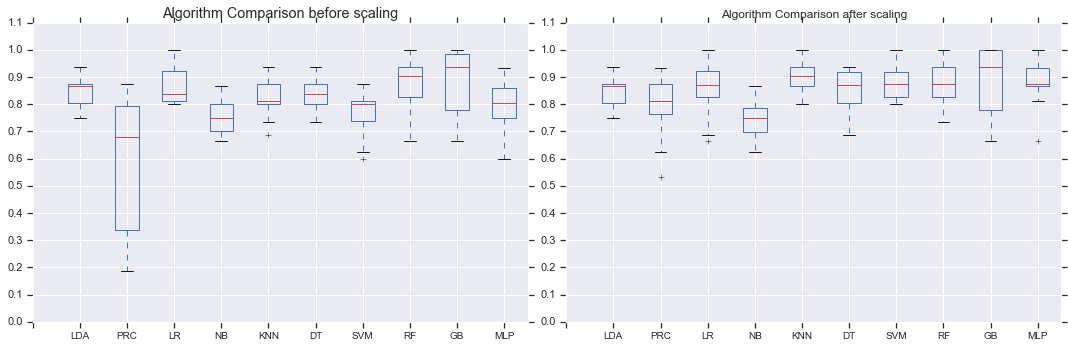

In [25]:
# Compare Algorithms
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.boxplot(results)
plt.title('Algorithm Comparison before scaling', size='large')
plt.xticks(range(len(names)+1), ['']+names, size='small')
plt.yticks(np.arange(0,1.2,0.1))

plt.subplot(1, 2, 2)
plt.boxplot(results_scaled)
plt.title('Algorithm Comparison after scaling')
plt.xticks(range(len(names)+1), ['']+names, size='small')
plt.yticks(np.arange(0,1.2,0.1))

plt.tight_layout()
plt.show()

## Tuning the parameters of the algorithms

In [26]:
# KNN Algorithm tuning
scaler = StandardScaler().fit(x_train)
rescaledX = scaler.transform(x_train)
k_values = np.array([1,3,5,7,9,11,13,15,17,19,21,23,25])
param_grid = dict(n_neighbors=k_values)
model = KNeighborsClassifier()
kfold = ms.KFold(n_splits=num_folds, random_state=seed)
grid = ms.GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, y_train)
print("\nBest: %f using %s\n" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
params = grid_result.cv_results_['params']
for mean, param in zip(means, params):
    print("%f with: %r" % (mean, param))


Best: 0.974359 using {'n_neighbors': 1}

0.974359 with: {'n_neighbors': 1}
0.923077 with: {'n_neighbors': 3}
0.903846 with: {'n_neighbors': 5}
0.878205 with: {'n_neighbors': 7}
0.852564 with: {'n_neighbors': 9}
0.820513 with: {'n_neighbors': 11}
0.814103 with: {'n_neighbors': 13}
0.801282 with: {'n_neighbors': 15}
0.801282 with: {'n_neighbors': 17}
0.801282 with: {'n_neighbors': 19}
0.788462 with: {'n_neighbors': 21}
0.794872 with: {'n_neighbors': 23}
0.788462 with: {'n_neighbors': 25}


In [27]:
# GBM Algorithm tuning
param_grid = {'learning_rate':[0.15,0.1,0.05,0.01,0.005,0.001], 'n_estimators':[50,100,150,200,250,300,400]}
scaler = StandardScaler().fit(x_train)
rescaledX = scaler.transform(x_train)
model = GradientBoostingClassifier()
kfold = ms.KFold(n_splits=num_folds, random_state=seed)
grid = ms.GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, y_train)
print("\nBest: %f using %s\n" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
params = grid_result.cv_results_['params']
for mean, param in zip(means, params):
    print("%f with: %r" % (mean, param))


Best: 0.916667 using {'learning_rate': 0.15, 'n_estimators': 50}

0.916667 with: {'learning_rate': 0.15, 'n_estimators': 50}
0.910256 with: {'learning_rate': 0.15, 'n_estimators': 100}
0.897436 with: {'learning_rate': 0.15, 'n_estimators': 150}
0.910256 with: {'learning_rate': 0.15, 'n_estimators': 200}
0.903846 with: {'learning_rate': 0.15, 'n_estimators': 250}
0.903846 with: {'learning_rate': 0.15, 'n_estimators': 300}
0.891026 with: {'learning_rate': 0.15, 'n_estimators': 400}
0.891026 with: {'learning_rate': 0.1, 'n_estimators': 50}
0.897436 with: {'learning_rate': 0.1, 'n_estimators': 100}
0.891026 with: {'learning_rate': 0.1, 'n_estimators': 150}
0.891026 with: {'learning_rate': 0.1, 'n_estimators': 200}
0.891026 with: {'learning_rate': 0.1, 'n_estimators': 250}
0.891026 with: {'learning_rate': 0.1, 'n_estimators': 300}
0.891026 with: {'learning_rate': 0.1, 'n_estimators': 400}
0.871795 with: {'learning_rate': 0.05, 'n_estimators': 50}
0.884615 with: {'learning_rate': 0.05, 'n_e

## Ensemble methods

ScaledAB: 0.897500
ScaledGBM: 0.890417
ScaledRF: 0.865417
ScaledET: 0.916250


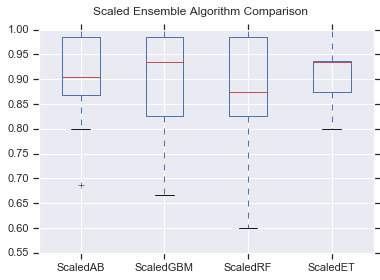

In [28]:
# ensembles
ensembles = []
ensembles.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()),('AB', AdaBoostClassifier())])))
ensembles.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingClassifier())])))
ensembles.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestClassifier())])))
ensembles.append(('ScaledET', Pipeline([('Scaler', StandardScaler()),('ET', ExtraTreesClassifier())])))

results = []
names = []
for name, model in ensembles:
    kfold = ms.KFold(n_splits=num_folds, random_state=seed)
    cv_results = ms.cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f" % (name, cv_results.mean())
    print(msg)

# Compare Algorithms
fig = plt.figure()
fig.suptitle('Scaled Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [29]:
# Tune scaled ET
scaler = StandardScaler().fit(x_train)
rescaledX = scaler.transform(x_train)
param_grid = dict(n_estimators=np.array([50,100,150,200,250,300,350,400]))
model = ExtraTreesClassifier(random_state=seed)
kfold = ms.KFold(n_splits=num_folds, random_state=seed)
grid = ms.GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, y_train)

print("\nBest: %f using %s\n" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, param in zip(means, params):
    print("%f  with: %r" % (mean, param))


Best: 0.942308 using {'n_estimators': 100}

0.935897  with: {'n_estimators': 50}
0.942308  with: {'n_estimators': 100}
0.942308  with: {'n_estimators': 150}
0.935897  with: {'n_estimators': 200}
0.935897  with: {'n_estimators': 250}
0.935897  with: {'n_estimators': 300}
0.942308  with: {'n_estimators': 350}
0.935897  with: {'n_estimators': 400}


## XGBClassifier

In [30]:
#Get the features and labels
features=df1.loc[:,df1.columns!='status'].values[:,1:]
labels=df1.loc[:,'status'].values

#Get the count of each label (0 and 1) in labels
print(labels[labels==1].shape[0], labels[labels==0].shape[0])

#Scale the features to between -1 and 1
scaler=MinMaxScaler((-1,1))
x=scaler.fit_transform(features)
y=labels

#Split the dataset
x_train,x_test,y_train,y_test=ms.train_test_split(x, y, test_size=0.2, random_state=7)

#Train the model - eXtreme Gradient Boosting- using gradient boosting algorithms
model=XGBClassifier()
model.fit(x_train,y_train)

#Calculate the accuracy
y_pred=model.predict(x_test)
print(metrics.accuracy_score(y_test, y_pred)*100)

147 48
94.87179487179486


In [31]:
# Tune scaled XGBClassifier
scaler = StandardScaler().fit(x_train)
rescaledX = scaler.transform(x_train)
param_grid = dict(n_estimators=np.array([150,200,250,300,350]), 
                  learning_rate=np.array([0.001,0.01,0.05,0.1,1,10]),
                  gamma=np.array([0.001,0.01,0.05,0.1,0, 1]))
model = XGBClassifier(random_state=seed)
kfold = ms.KFold(n_splits=num_folds, random_state=seed)
grid = ms.GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, y_train)

print("\nBest: %f using %s\n" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, param in zip(means, params):
    print("%f  with: %r" % (mean, param))


Best: 0.929487 using {'gamma': 0.001, 'learning_rate': 0.1, 'n_estimators': 300}

0.871795  with: {'gamma': 0.001, 'learning_rate': 0.001, 'n_estimators': 150}
0.871795  with: {'gamma': 0.001, 'learning_rate': 0.001, 'n_estimators': 200}
0.865385  with: {'gamma': 0.001, 'learning_rate': 0.001, 'n_estimators': 250}
0.865385  with: {'gamma': 0.001, 'learning_rate': 0.001, 'n_estimators': 300}
0.865385  with: {'gamma': 0.001, 'learning_rate': 0.001, 'n_estimators': 350}
0.871795  with: {'gamma': 0.001, 'learning_rate': 0.01, 'n_estimators': 150}
0.865385  with: {'gamma': 0.001, 'learning_rate': 0.01, 'n_estimators': 200}
0.858974  with: {'gamma': 0.001, 'learning_rate': 0.01, 'n_estimators': 250}
0.884615  with: {'gamma': 0.001, 'learning_rate': 0.01, 'n_estimators': 300}
0.884615  with: {'gamma': 0.001, 'learning_rate': 0.01, 'n_estimators': 350}
0.910256  with: {'gamma': 0.001, 'learning_rate': 0.05, 'n_estimators': 150}
0.910256  with: {'gamma': 0.001, 'learning_rate': 0.05, 'n_estima

## Model Selection & Finalization - KNN

In [32]:
# prepare the model
scaler = StandardScaler().fit(x_train)
rescaledX = scaler.transform(x_train)
model = KNeighborsClassifier(n_neighbors=1)
model.fit(rescaledX, y_train)

# transform the validation dataset
rescaledXtest = scaler.transform(x_test)
y_pred = model.predict(rescaledXtest)

In [33]:
def cm_analysis(y_true, y_pred, filename, labels, ymap=None, figsize=(10,10)):

    if ymap is not None:
        y_pred = [ymap[yi] for yi in y_pred]
        y_true = [ymap[yi] for yi in y_true]
        labels = [ymap[yi] for yi in labels]
    cm = metrics.confusion_matrix(y_true, y_pred, labels=labels)
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=labels, columns=labels)
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, annot=annot, fmt='', ax=ax)
    plt.savefig(filename)

Accuracy:  0.9743589743589743 

              precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       0.97      1.00      0.98        32

    accuracy                           0.97        39
   macro avg       0.98      0.93      0.95        39
weighted avg       0.98      0.97      0.97        39



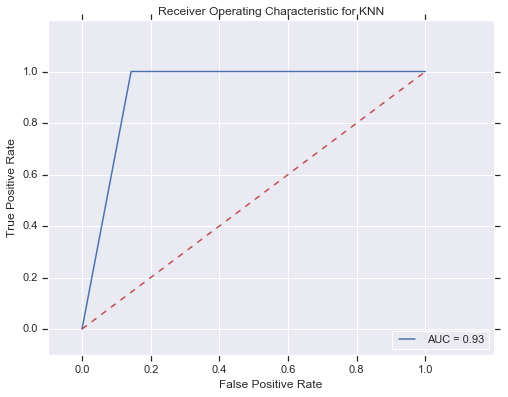

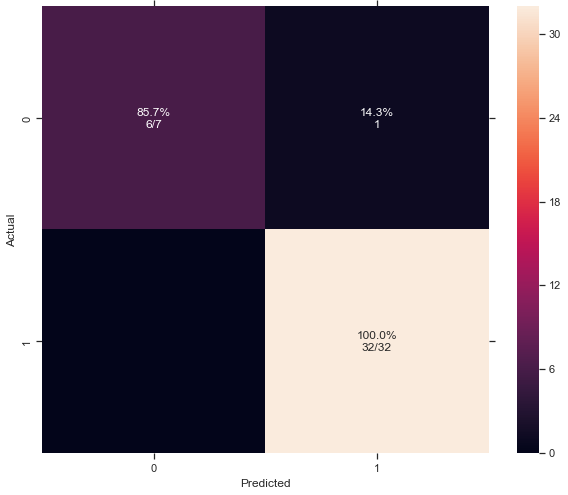

In [34]:
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred), '\n')
print(metrics.classification_report(y_test, y_pred))

false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(false_positive_rate, true_positive_rate)
plt.figure(figsize=(8,6))
plt.title('Receiver Operating Characteristic for KNN')
plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
print('\n')

cm_analysis(y_test, y_pred, 'Confusion.PNG', [0, 1], ymap=None, figsize=(10,8))

## Results

- Problem Definition (Parkinson’s disease Data).
- Loading the Dataset.
- Data Analysis (some skewed distributions and correlated attributes).
- Evaluate Algorithms (Gradient Boosting Classifier looked good).
- Evaluate Algorithms with Standardization (KNN and Gradient Boosting Classifier looked good).
- Algorithm Tuning (K=1 for KNN was best).
- Ensemble Methods (Extra Trees Classifier looked good).
- Tuning Ensemble Methods (getting the most from ExtraTreesClassifier).
- Finalize Model (use all training data and confirm using validation dataset on the selected algorithm (KNN)).